In [82]:
  import pandas as pd

In [83]:
df = pd.read_csv('D:\Hackathon\MachineHack - Music\Data_Train.csv')
df.head(30)
df.shape

(78458, 11)

In [84]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
#df.to_csv('newly_written.csv')

In [85]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
#df.to_csv('newly_written.csv')

(array([   17,    43,    45, ..., 72541, 72597, 72624], dtype=int64),)
(70622, 11)
(array([   45,    46,    93, ..., 70551, 70583, 70612], dtype=int64),)
(68844, 11)
(array([   24,    62,    80, ..., 68778, 68790, 68816], dtype=int64),)
(67034, 11)
(67034, 11)


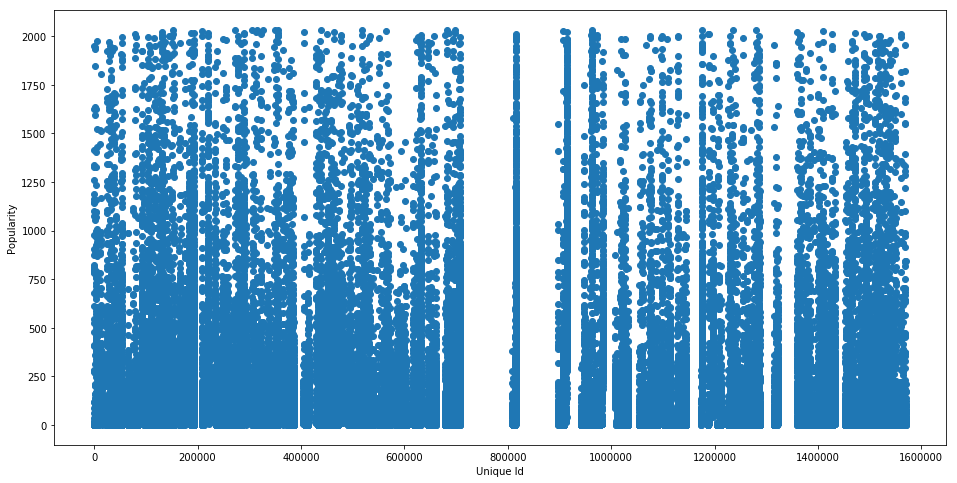

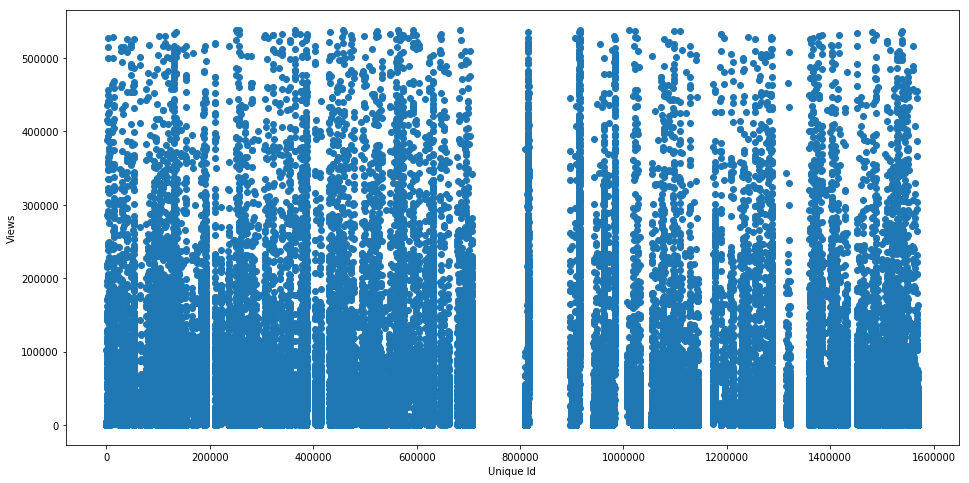

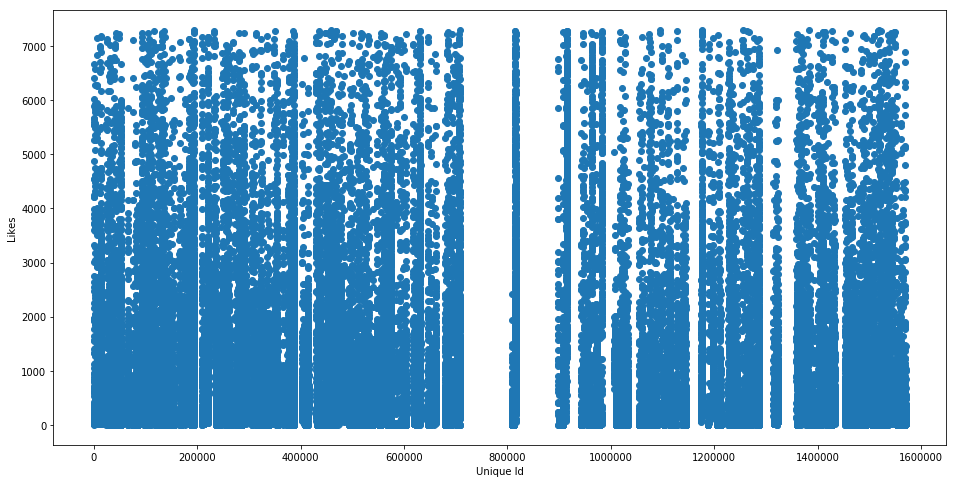

In [102]:
# Remove Outliers of Popularity
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Popularity']))
print(np.where(z > 3))
df = df[(z < 3)]
print(df.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Popularity'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Popularity')

# Remove Outliers of Views
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Views']))
print(np.where(z > 3))
df = df[(z < 3)]
print(df.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Views'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Views')

# Remove Outliers of Likes
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Likes']))
print(np.where(z > 3))
df = df[(z < 3)]
print(df.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Likes'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Likes')

print(df.shape)


In [103]:
# Extracting Genre, Likes, Popularity to X & Views to Y
X = df[['Genre','Likes','Popularity']]
Y = df['Views']
df_scaled = df[['Likes', 'Popularity']]
print(X.shape)
print(Y.shape)

(67034, 3)
(67034,)


In [104]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_x = LabelEncoder()
X_label = X.iloc[:, 0]
X_le = le_x.fit_transform(X_label)
X_le_df = pd.DataFrame(X_le)
X_le_df.head(30)
print(X_le_df.shape)
print(df_scaled.shape)
X_le_df_list = pd.DataFrame(X_le_df).values
onehotencoder = OneHotEncoder()
X_le_df_list = onehotencoder.fit_transform(X_le_df_list).toarray()
X = pd.DataFrame(X_le_df_list)
X_le_df.shape
# df_scaled['label_genre']=X_le_df
# df_scaled.head()

(67034, 1)
(67034, 2)


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(67034, 1)

In [105]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
df_scaled = sc_x.fit_transform(df.iloc[:, 8:10])
df_scaled = pd.DataFrame(df_scaled,columns=['Likes','Popularity'])
df_scaled.head(30)

,Likes,Popularity
0,-0.396520,-0.271373
1,-0.694044,-0.554618
2,-0.520158,-0.292617
3,0.860353,-0.345725
4,1.277547,1.860044
5,2.248797,0.535874
6,-0.054037,0.185359
7,-0.668259,-0.572321
8,-0.707928,-0.590024
9,-0.315197,-0.448401


In [106]:
#Joining two data frame alone columns

df_train = X.join(df_scaled, lsuffix='_caller')
print(df_train.shape)

(67034, 23)


In [107]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import xgboost as xgb

In [109]:
X = df_train
Y = Y
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
X_test_df = pd.DataFrame(X_test)
Y_test_df = pd.DataFrame(y_test)

X_test_df.to_csv(r'D:\Hackathon\MachineHack - Music\new\x_test.csv')
Y_test_df.to_csv(r'D:\Hackathon\MachineHack - Music\new\y_test.csv',sep='#')


In [99]:
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print('\nMean Square error" ', mean_squared_error(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))





[18:48:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.20247e+06
[1]	validation_0-rmse:1.09278e+06


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[2]	validation_0-rmse:995945
[3]	validation_0-rmse:909238
[4]	validation_0-rmse:832582
[5]	validation_0-rmse:764540
[6]	validation_0-rmse:704111
[7]	validation_0-rmse:650642
[8]	validation_0-rmse:603691
[9]	validation_0-rmse:562822
[10]	validation_0-rmse:527314
[11]	validation_0-rmse:495381
[12]	validation_0-rmse:468192
[13]	validation_0-rmse:444489
[14]	validation_0-rmse:423880
[15]	validation_0-rmse:405352
[16]	validation_0-rmse:390424
[17]	validation_0-rmse:376785
[18]	validation_0-rmse:365444
[19]	validation_0-rmse:356297
[20]	validation_0-rmse:348811
[21]	validation_0-rmse:341734
[22]	validation_0-rmse:335991
[23]	validation_0-rmse:329950
[24]	validation_0-rmse:325302
[25]	validation_0-rmse:322521
[26]	validation_0-rmse:320143
[27]	validation_0-rmse:316510
[28]	validation_0-rmse:313882
[29]	validation_0-rmse:313040
[30]	validation_0-rmse:310534
[31]	validation_0-rmse:310011
[32]	validation_0-rmse:308677
[33]	validation_0-rmse:307422
[34]	validation_0-rmse:305684
[35]	validation_0-

In [110]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()
# y_pred_df.iloc[:,:1,].to_csv(r'D:\Hackathon\MachineHack - Music\new\y_pred.csv')
y_pred_df.to_csv(r'D:\Hackathon\MachineHack - Music\new\y_pred.csv',sep='#')


# print ("{:f}".format(float("1.174018e+04")))

In [ ]:
# import numpy as np

# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# #mean_absolute_percentage_error(y_test, y_pred)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
X_test = pd.DataFrame(X_test)
print()
